# Visualizing the Gender Gap in College Degrees

[The Department of Education Statistics](https://nces.ed.gov/programs/digest/index.asp) provides a compilation of statistical information in American education from prekindergarten through graduate school.

Data scientist Randal Olson created a clean data set using [NCES 2013 Digest of Education Statistics](http://nces.ed.gov/programs/digest/2013menu_tables.asp) and we will use this data set to explore the gender gap in STEM fields (science, technology, engineering and mathematics). This gap is reported on often in the media and not everyone agrees that there is a gap.

### Exploring the data

To read in and explore the data set:

In [1]:
import pandas as pd

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

In [2]:
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [3]:
women_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           42 non-null     int64  
 1   Agriculture                    42 non-null     float64
 2   Architecture                   42 non-null     float64
 3   Art and Performance            42 non-null     float64
 4   Biology                        42 non-null     float64
 5   Business                       42 non-null     float64
 6   Communications and Journalism  42 non-null     float64
 7   Computer Science               42 non-null     float64
 8   Education                      42 non-null     float64
 9   Engineering                    42 non-null     float64
 10  English                        42 non-null     float64
 11  Foreign Languages              42 non-null     float64
 12  Health Professions             42 non-null     float

The data set has 17 categories of degrees, with every category in separate column.

In [4]:
women_degrees['Year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011], dtype=int64)

Data is provided from the year 1970 to 2011.

### Initial visualizations

Initial visualizations for STEM category:

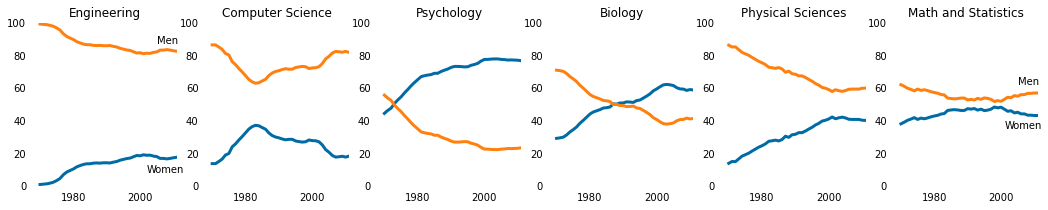

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

### Comparing across all degrees

To make a comparison across all degrees:

In [6]:
women_degrees.columns

Index(['Year', 'Agriculture', 'Architecture', 'Art and Performance', 'Biology',
       'Business', 'Communications and Journalism', 'Computer Science',
       'Education', 'Engineering', 'English', 'Foreign Languages',
       'Health Professions', 'Math and Statistics', 'Physical Sciences',
       'Psychology', 'Public Administration', 'Social Sciences and History'],
      dtype='object')

There are 17 degrees we need to visualize, so we can use a subplot grid layout of 6 rows and 3 columns. We will also group the degrees into STEM, liberal arts and other:

In [7]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science',  'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture', 'Business', 'Architecture']

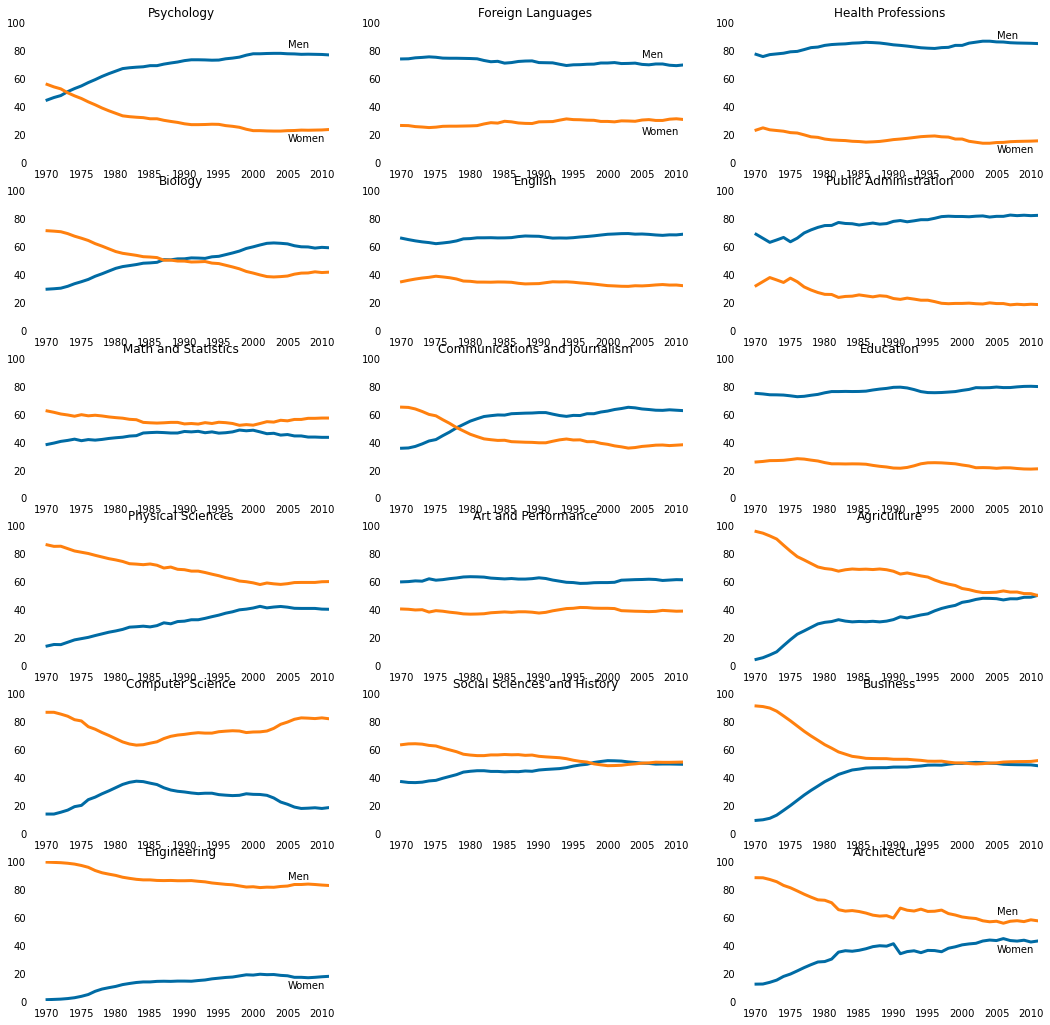

In [8]:
fig = plt.figure(figsize=(18, 18))

# first column - STEM degrees
for sp in range(0,6):
    ax = fig.add_subplot(6,3,3*sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if sp == 0:
        ax.text(2005, 82, 'Men')
        ax.text(2005, 15, 'Women')
    elif sp == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2005, 9, 'Women')
        

# second column - liberal arts degrees
for sp in range(0,5):
    ax = fig.add_subplot(6,3,3*sp+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if sp == 0:
        ax.text(2005, 75, 'Men')
        ax.text(2005, 20, 'Women')
    #elif sp == 4:
        # ax.text(2005, 55, 'Men')
        # ax.text(2005, 40, 'Women')
        ## we won't mark Men and Women on the last chart, because the lines overlap

# third column - other degrees       
for sp in range(0,6):
    ax = fig.add_subplot(6,3,3*sp+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if sp == 0:
        ax.text(2005, 89, 'Men')
        ax.text(2005, 7, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2005, 35, 'Women')
           
        
plt.show()

### Customizing the visualizations

We want to:
- disable x-axis labels for all line charts except the bottommost line charts in each column
- enable just the y-axis labels at 0 and 100
- create a horizontal line that:
    * starts at the y-axis position 50
    * is set to the third color (light gray) in the Color Blind 10 palette
    * has a transparency of 0.3
    
Additionally, we want to export the figure containing all of the line charts to `gender_degrees.png`.

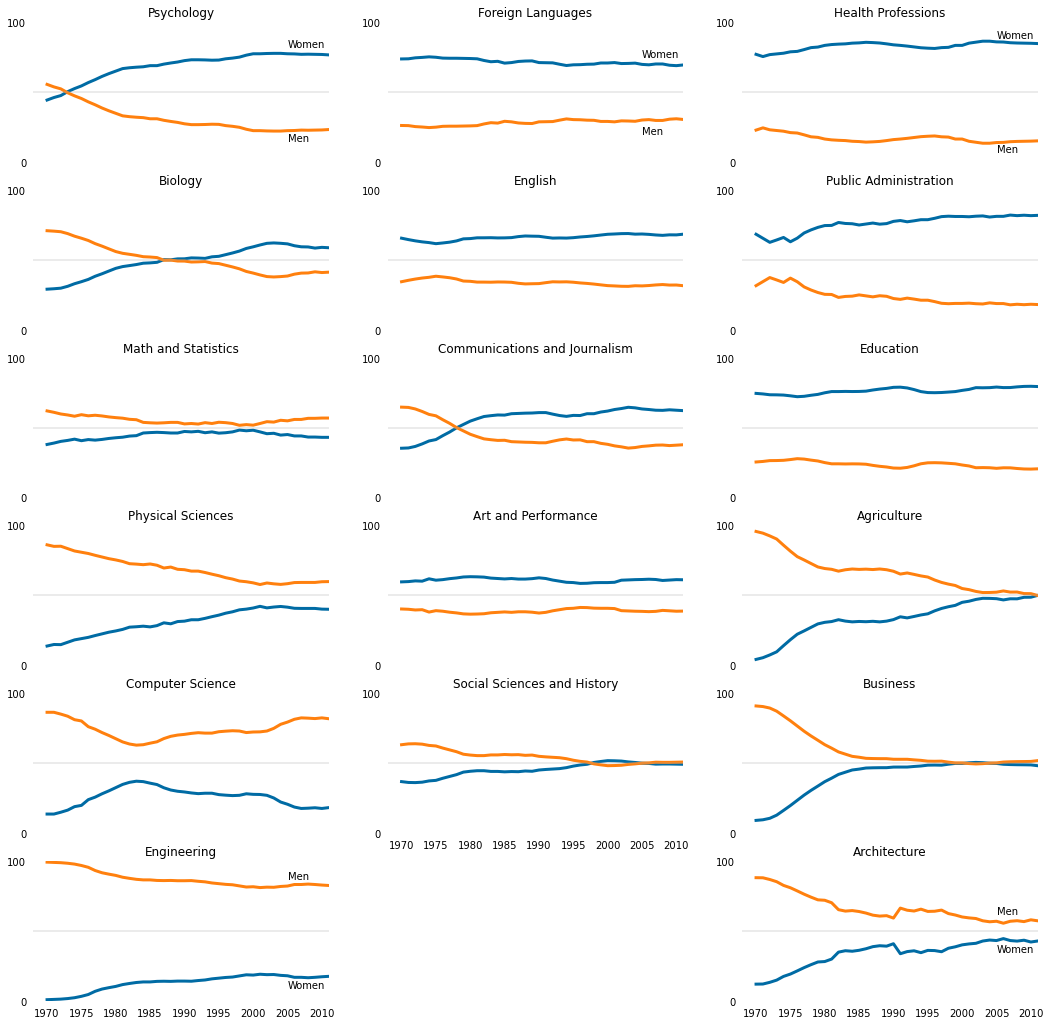

In [9]:
fig = plt.figure(figsize=(18, 18))

for sp in range(0,6):
    ax = fig.add_subplot(6,3,3*sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_yticks([0,100])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if sp == 0:
        ax.text(2005, 82, 'Women')
        ax.text(2005, 15, 'Men')
    elif sp == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2005, 9, 'Women')
        ax.tick_params(labelbottom='on')


for sp in range(0,5):
    ax = fig.add_subplot(6,3,3*sp+2)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(lib_arts_cats[sp])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_yticks([0,100])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if sp == 0:
        ax.text(2005, 75, 'Women')
        ax.text(2005, 20, 'Men')
    elif sp == 4:
        # ax.text(2005, 55, 'Men')
        # ax.text(2005, 40, 'Women')
        ax.tick_params(labelbottom='on')

        
for sp in range(0,6):
    ax = fig.add_subplot(6,3,3*sp+3)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(other_cats[sp])
    ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
    ax.set_yticks([0,100])
    ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)
    
    if sp == 0:
        ax.text(2005, 89, 'Women')
        ax.text(2005, 7, 'Men')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2005, 35, 'Women')
        ax.tick_params(labelbottom='on')   

plt.savefig("gender_degrees.png")        
plt.show()

Degrees with the biggest gap in the 1970s are:
- Engineering, Agriculture, Business, Architecture, Physical Sciences, Computer Science (men in majority)
- Health Professions, Education and Foreign Languages (women in majority)

Out of these, the gap closed in 2011 in Business and Agriculture and significantly diminished in Architecture and Physical Sciences. 
The gap is still remaining in Health Professions, Engineering, Computer Science (was diminishing, but widened again) and Foreign Languages.

Interestingly, while there is a very small gap in the 1970s in Psychology, in 2011 there is a big gap with women in majority.

Degrees that have switched gender in the gap are Biology and Communications and Journalism (from men in majority to women in majority).

Degrees where the gap is approximately the same from 1970s to 2011 are Foreign Languages, Education, Health Professions, English, and Art and Performance with women in majority.

In Public Administration the gap has widened with women in majority.

The smallest gaps in 1970s are in Social Sciences and History (closed in 2011), Math and Statistics (still a small gap with men in majority), and Art and Performance (still a gap with women in  majority).